In [1]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *
 
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [2]:
urls = search_images('llama', max_images=1)
urls[0]

'https://www.renovablesverdes.com/wp-content/uploads/2020/05/Lama-glama.jpg'

In [3]:
from fastdownload import download_url
dest = 'llama.jpg'
download_url(urls[0], dest)

Path('llama.jpg')

In [4]:
from fastai.vision.core import PILImage
from fastai.vision.utils import *
from fastai.vision.data import get_image_files
from fastai.vision.all import *


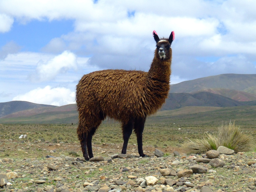

In [5]:
img = PILImage.create('llama.jpg')
img.to_thumb(256, 256)

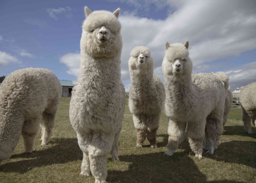

In [6]:
download_url(search_images('alpaca', max_images=1)[0], 'alpaca.jpg')
PILImage.create('alpaca.jpg').to_thumb(256,256)

In [9]:
searches = 'llama', 'alpaca'
path = Path('llama_or_alpaca')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f' {o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)
    

Signature:
download_images(
    dest,
    url_file=None,
    urls=None,
    max_pics=1000,
    n_workers=8,
    timeout=4,
    preserve_filename=False,
)
Source:   
def download_images(dest, url_file=None, urls=None, max_pics=1000, n_workers=8, timeout=4, preserve_filename=False):
    "Download images listed in text file `url_file` to path `dest`, at most `max_pics`"
    if urls is None: urls = url_file.read_text().strip().split("\n")[:max_pics]
    dest = Path(dest)
    dest.mkdir(exist_ok=True)
    parallel(partial(_download_image_inner, dest, timeout=timeout, preserve_filename=preserve_filename),
             list(enumerate(urls)), n_workers=n_workers, threadpool=True)
File:      ~/miniforge3/envs/fastai/lib/python3.12/site-packages/fastai/vision/utils.py
Type:      function

In [ ]:
failed = verify_images(get_image_files(path))

In [ ]:
failed.map(Path.unlink)

In [ ]:
len(failed)

In [ ]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

In [ ]:
is_llama,_,probs = learn.predict(PILImage.create('llama_or_alpaca/alpaca/00d9da6c-7985-47d2-9891-9811acb146b2.jpg'))
print(f"This is a: {is_llama}.")
print(f"Probability it's an alpaca: {probs[0]:.4f}")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [ ]:
from fastai.vision.widgets import *
import ipywidgets as widgets
from IPython.display import display

cleaner = ImageClassifierCleaner(learn, max_n=12)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
import shutil
import os

for idx, cat in cleaner.change():
    dest_path = path/cat/cleaner.fns[idx].name
    if dest_path.exists():
        os.remove(dest_path)
    shutil.move(str(cleaner.fns[idx]), dest_path)